## Projetos de Análise de Dados com Python

## Projeto 4 - Técnicas de Análise Exploratória e Interpretação de Gráficos Estatíticos

### Pacotes Python Usados no projeto

In [1]:
!pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark
%watermark -a "Felipe Nunes - Analista de Dados" 

Author: Felipe Nunes - Analista de Dados



### Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv("dataset.csv")

In [5]:
# Shape
df_dsa.shape

(1200, 11)

In [6]:
# Amostra
df_dsa.head()

,id,data_lancamento,conta_debito,conta_credito,valor,documento,natureza_operacao,centro_custo,impostos,moeda,taxa_conversao
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,NaN,3.475606
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,NaN,CC98G2K,471.09236,JPY,3.523287
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,NaN,OP62LG1,CCZD80Y,154.26398,EUR,3.523287


In [7]:
# Colunas
df_dsa.columns

Index(['id', 'data_lancamento', 'conta_debito', 'conta_credito', 'valor',
       'documento', 'natureza_operacao', 'centro_custo', 'impostos', 'moeda',
       'taxa_conversao'],
      dtype='object')

## Análise Exploratória antes da Limpeza

In [8]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1200 non-null   int64  
 1   data_lancamento    1200 non-null   object 
 2   conta_debito       1200 non-null   object 
 3   conta_credito      1200 non-null   object 
 4   valor              1200 non-null   float64
 5   documento          1078 non-null   object 
 6   natureza_operacao  1080 non-null   object 
 7   centro_custo       1200 non-null   object 
 8   impostos           1020 non-null   float64
 9   moeda              947 non-null    object 
 10  taxa_conversao     982 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 103.3+ KB


In [9]:
# Há valores ausentes? Sim ou não?
df_dsa.isna().any()

id                   False
data_lancamento      False
conta_debito         False
conta_credito        False
valor                False
documento             True
natureza_operacao     True
centro_custo         False
impostos              True
moeda                 True
taxa_conversao        True
dtype: bool

In [10]:
# Há valores ausentes? Quantos?
df_dsa.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento            122
natureza_operacao    120
centro_custo           0
impostos             180
moeda                253
taxa_conversao       218
dtype: int64

In [11]:
# Calculando a soma dos valores ausentes por coluna
valores_ausentes = df_dsa.isna().sum()

# Calculando o número total de linhas
total_linhas = len(df_dsa)

# Calculando a proporção de valores ausentes por coluna
proporcao_valores_ausentes = valores_ausentes / total_linhas

# Exibindo a proporção de valores ausentes
print(proporcao_valores_ausentes * 100)

id                    0.000000
data_lancamento       0.000000
conta_debito          0.000000
conta_credito         0.000000
valor                 0.000000
documento            10.166667
natureza_operacao    10.000000
centro_custo          0.000000
impostos             15.000000
moeda                21.083333
taxa_conversao       18.166667
dtype: float64


### Visualizações

**Distribuição dos Valores dos Lançamentos:** Histograma que mostra a distribuição dos valores monetários dos lançamentos. A linha de densidade (KDE) ajuda a entender a forma da distribuição.

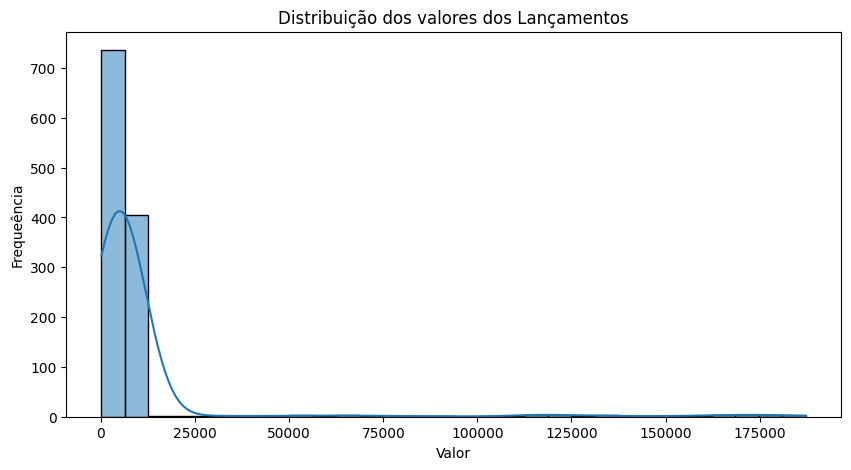

In [12]:
# Gráfico 1: Distribuição dos valores dos lançamentos
plt.figure(figsize = (10, 5))
sns.histplot(df_dsa['valor'], kde = True, bins = 30)
plt.title('Distribuição dos valores dos Lançamentos')
plt.xlabel('Valor')
plt.ylabel('Frequeência')
plt.show()

**Valores dos Lançamentos ao Longo do Tempo**: Um gráfico de linhas que exibe como os valores dos lançamentos variaram ao longo do tempo. Isso pode ajudar a identificar tendências ou padrões sazonais nos dados.

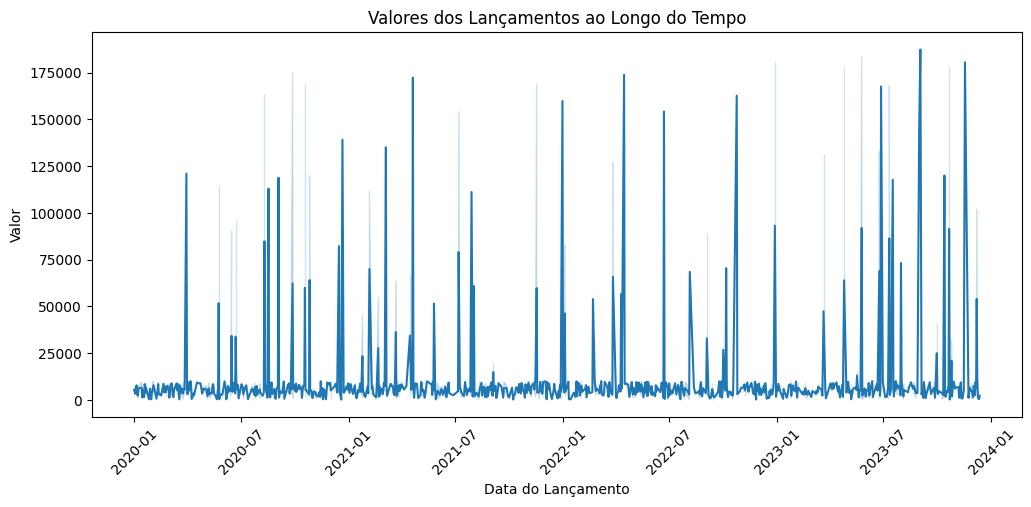

In [13]:
# Gráfico 2: Valores dos lançamentos ao longo do tempo
plt.figure(figsize = (12, 5))
df_dsa['data_lancamento'] = pd.to_datetime(df_dsa['data_lancamento'])
sns.lineplot(x = 'data_lancamento', y = 'valor', data = df_dsa)
plt.title('Valores dos Lançamentos ao Longo do Tempo')
plt.xlabel('Data do Lançamento')
plt.ylabel('Valor')
plt.xticks(rotation = 45)
plt.show()

**Boxplot dos Impostos**: Este boxplot fornece uma visão sobre a distribuição dos valores dos impostos, destacando a mediana, quartis e possíveis outliers.

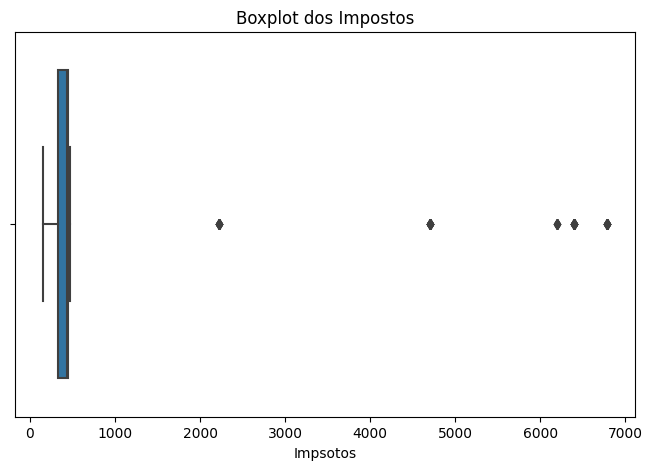

In [14]:
# Gráfico 3: Boxplot dos impostos
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_dsa['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impsotos')
plt.show()

**Contagem de Operações por Moeda**: Um gráfico de barras mostrando o número de operações realizadas em diferentes moedas. Isso pode ser útil para entender a predominância de certas moedas nas operações. (Usados normalmente em variáveis categóricas)

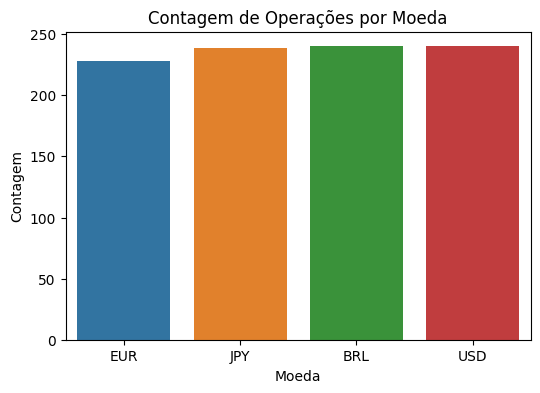

In [15]:
# Gráfico 4: Contagem de operações por moeda
plt.figure(figsize = (6, 4))
sns.countplot(x = 'moeda', data = df_dsa)
plt.title('Contagem de Operações por Moeda')
plt.xlabel('Moeda')
plt.ylabel('Contagem')
plt.show()

## Tratamento de Valores Ausentes

**1. Tratamento de Valores Ausentes para Variável Númerica**

Para variáveis númericas, como 'valor' ou 'impostos', uma abordagem comum é substituir os valores ausentes pela média ou mediana da coluna. A escolha entre média e mediana geralmente depende da distribuição dos dados.

In [16]:
# Há valores ausentes?
df_dsa['impostos'].isna().sum()

180

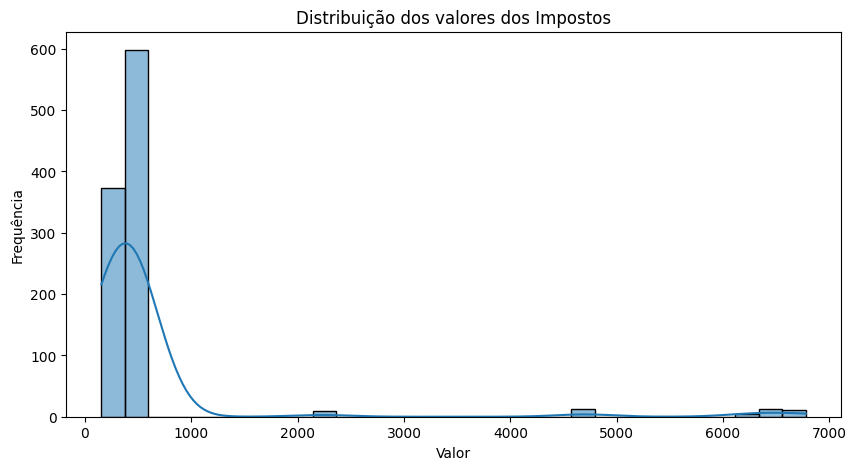

In [17]:
# Distribuição dos valores dos impostos
plt.figure(figsize = (10, 5))
sns.histplot(df_dsa['impostos'], kde = True, bins = 30)
plt.title('Distribuição dos valores dos Impostos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

In [18]:
# Média
df_dsa['impostos'].mean()

604.264545965864

In [19]:
# Mediana (vamos usar a mediana, pois a média está sendo afetada pelos outliers e a mediana não
df_dsa['impostos'].median()

430.1553391717098

In [20]:
# Substituindo valores ausentes em 'impostos' pela mediana
df_dsa['impostos'].fillna(df_dsa['impostos'].median(), inplace = True)

In [21]:
# Há valores ausentes?
df_dsa['impostos'].isna().sum()

0

**2. Tratamento de Valores Ausentes para Variável Categórica**

Para variáveis categóricas, como 'moeda', você pode substituir os valores ausentes pelo valor mais frequente (moda) ou categorizar como 'Desconhecido'.

In [22]:
# Há valores ausentes? Quantos
df_dsa.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento            122
natureza_operacao    120
centro_custo           0
impostos               0
moeda                253
taxa_conversao       218
dtype: int64

In [23]:
# Há valores ausentes?
df_dsa['moeda'].isna().sum()

253

In [24]:
# Calcula a moda
df_dsa['moeda'].mode()[0]

'BRL'

In [25]:
# Substituindo valores ausentes em 'moeda' pela moda
df_dsa['moeda'].fillna(df_dsa['moeda'].mode()[0], inplace = True)

In [26]:
# Há valores ausentes?
df_dsa['moeda'].isna().sum()

0

In [27]:
# Há valores ausentes? Quantos
df_dsa.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento            122
natureza_operacao    120
centro_custo           0
impostos               0
moeda                  0
taxa_conversao       218
dtype: int64

In [28]:
# Calculando a soma dos valores ausentes por coluna
valores_ausentes = df_dsa.isna().sum()

# Calculando o número total de linhas
total_linhas = len(df_dsa)

# Calculando a proporção de valores ausentes por coluna
proporcao_valores_ausentes = valores_ausentes / total_linhas

# Exibindo a proporção de valores ausentes
print(proporcao_valores_ausentes * 100)

id                    0.000000
data_lancamento       0.000000
conta_debito          0.000000
conta_credito         0.000000
valor                 0.000000
documento            10.166667
natureza_operacao    10.000000
centro_custo          0.000000
impostos              0.000000
moeda                 0.000000
taxa_conversao       18.166667
dtype: float64


In [29]:
# Preenchendo valores ausentes em 'taxa_conversao' com a categoria 'Outro'
df_dsa['taxa_conversao'].fillna('Outro', inplace = True)

In [30]:
# Preenchendo valores ausentes em 'documento' com a categoria 'Outro'
df_dsa['documento'].fillna('Outro', inplace = True)

In [31]:
# Preenchendo valores ausentes em 'natureza_operacao' com bfill
# Este método preenche cada valor ausente com o valor imediatamente posterior na mesma coluna (andamos par atrás)
df_dsa['natureza_operacao'].fillna(method = 'bfill', inplace = True)

**3. Tratamento de Valores Ausentes Quando Não Parece Valor Ausente**

Às vezes, os valores ausentes podem estar disfarçados com marcadores como 'N/A', '?', 'Desconhecido', ou até '0' em contextos onde '0' não é um valor válido. Identifique esses casos e trate-os como valores ausentes.

In [32]:
# Verificando se há o caracter '?' na coluna conta_credito (Método 1)
tem_valor_pergunta = df_dsa['conta_credito'].isin(['?']).any()
print(tem_valor_pergunta)

True


In [33]:
# Contando a frequência de cada valor na coluna (Método 2)
contagem_valores = df_dsa['conta_credito'].value_counts()

# Verificando se '?' está na contagem e obtendo seu número de ocorrências
numero_ocorrencias_pergunta = contagem_valores.get('?', 0)

# Imprime o número de ocorrências de '?'
print(numero_ocorrencias_pergunta)

4


In [34]:
# Identificar colunas categóricas (Método 3)
colunas_categoricas = df_dsa.select_dtypes(include = ['object', 'category']).columns

# Verificar a presença do valor "?" em cada coluna categórica
for coluna in colunas_categoricas:
    tem_valor_pergunta = df_dsa[coluna].isin(['?']).any()
    print(f"A coluna '{coluna}' contém '?'? {tem_valor_pergunta}")

A coluna 'conta_debito' contém '?'? False
A coluna 'conta_credito' contém '?'? True
A coluna 'documento' contém '?'? False
A coluna 'natureza_operacao' contém '?'? False
A coluna 'centro_custo' contém '?'? False
A coluna 'moeda' contém '?'? False
A coluna 'taxa_conversao' contém '?'? False


In [35]:
# Substituindo '?' por NaN e depois preenchendo os valores ausentes
df_dsa['conta_credito'].replace('?', np.nan, inplace = True)

# Este método preenche cada valor ausente com o valor imediatamente anterior na mesma coluna (andamos par frente)
df_dsa['conta_credito'].fillna(method = 'ffill', inplace = True)

In [36]:
# Há valores ausentes?
df_dsa['conta_credito'].isna().sum()

0

In [37]:
# Há valores ausentes?
df_dsa.isna().sum()

id                   0
data_lancamento      0
conta_debito         0
conta_credito        0
valor                0
documento            0
natureza_operacao    0
centro_custo         0
impostos             0
moeda                0
taxa_conversao       0
dtype: int64

## Tratamento de Outliers

> Vamos aplicar o tratamento de outliers nas variáveis "valor" e "impostos".

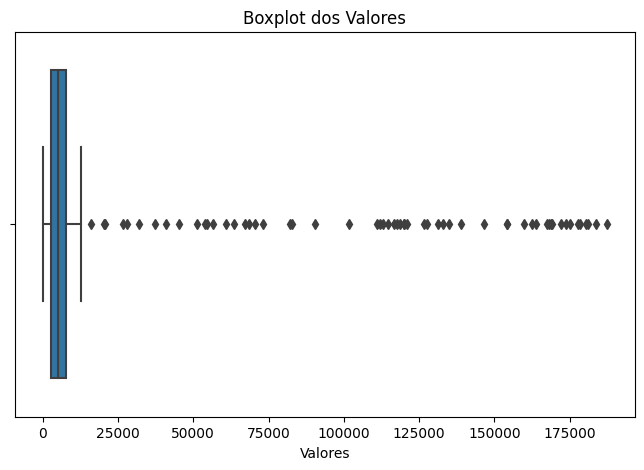

In [38]:
# Boxplot dos valores de lançamento
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_dsa['valor'])
plt.title('Boxplot dos Valores')
plt.xlabel('Valores')
plt.show()

In [39]:
# Tratamento de outliers na variável valor

# Calculando Q1 e Q3
Q1 = df_dsa['valor'].quantile(0.25)
Q3 = df_dsa['valor'].quantile(0.75)

# Calculando IQR
IQR = Q3 - Q1

# Definindo limites para determinar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df_dsa_filtrado_1 = df_dsa[~((df_dsa['valor'] < limite_inferior) | (df_dsa['valor'] > limite_superior))]

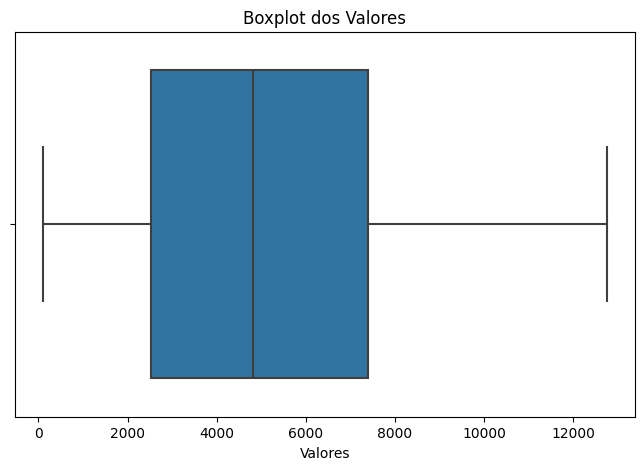

In [40]:
# Boxplot dos valores de lançamento
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_dsa_filtrado_1['valor'])
plt.title('Boxplot dos Valores')
plt.xlabel('Valores')
plt.show()

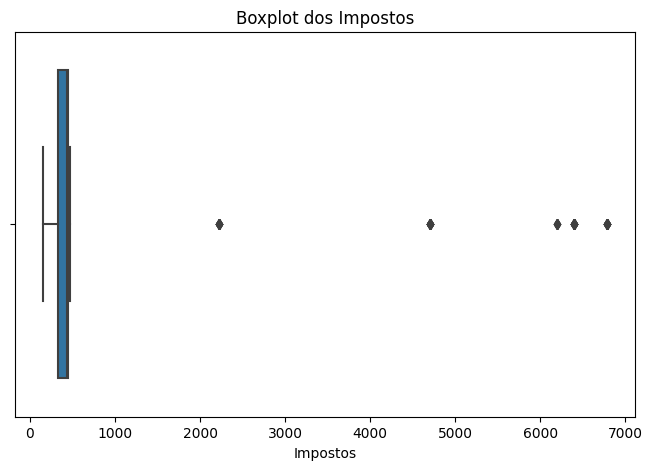

In [41]:
# Boxplot dos impostos
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_dsa['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impostos')
plt.show()

In [42]:
# Tratamento de outliers na variável impostos

# Calculando Q1 e Q3
Q1 = df_dsa['impostos'].quantile(0.25)
Q3 = df_dsa['impostos'].quantile(0.75)

# Calculando IQR
IQR = Q3 - Q1

# Definindo limites para determinar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df_dsa_filtrado_2 = df_dsa_filtrado_1[~((df_dsa_filtrado_1['impostos'] < limite_inferior) | (df_dsa_filtrado_1['impostos'] > limite_superior))]

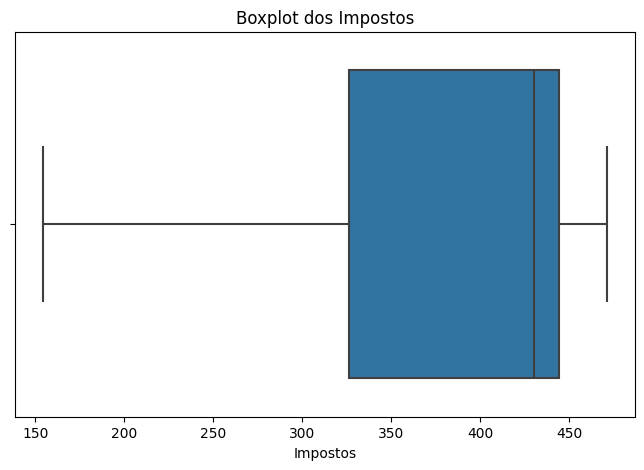

In [43]:
# Boxplot dos impostos
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_dsa_filtrado_2['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impostos')
plt.show()

## Análise Exploratória Depois da Limpeza

### Análise Exploratória Univariada

In [44]:
df_dsa_filtrado_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1097 non-null   int64         
 1   data_lancamento    1097 non-null   datetime64[ns]
 2   conta_debito       1097 non-null   object        
 3   conta_credito      1097 non-null   object        
 4   valor              1097 non-null   float64       
 5   documento          1097 non-null   object        
 6   natureza_operacao  1097 non-null   object        
 7   centro_custo       1097 non-null   object        
 8   impostos           1097 non-null   float64       
 9   moeda              1097 non-null   object        
 10  taxa_conversao     1097 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 102.8+ KB


### Analisando e Interpretando Histogramas

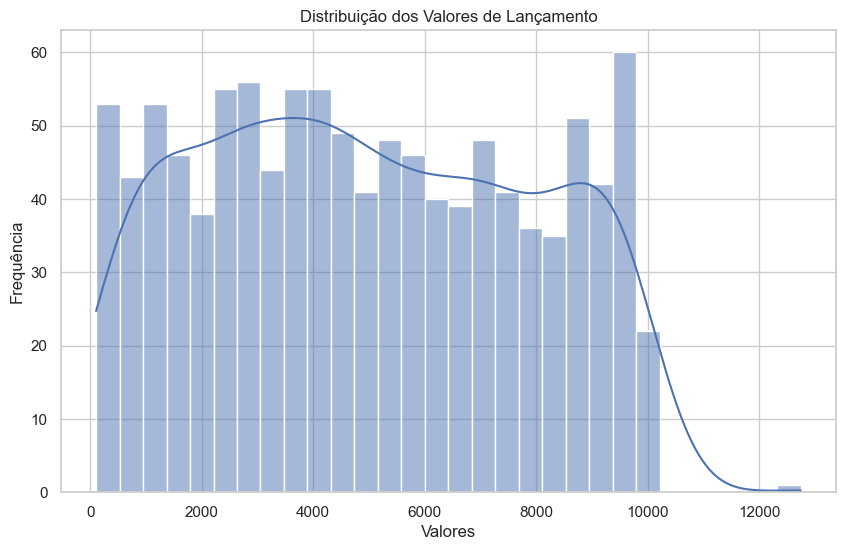

In [45]:
# Configurando o estilo do seaborn
sns.set(style = "whitegrid")

# Criando o histograma para a coluna 'valor'
plt.figure(figsize = (10, 6))
sns.histplot(df_dsa_filtrado_2['valor'], kde = True, bins = 30)
plt.title('Distribuição dos Valores de Lançamento')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

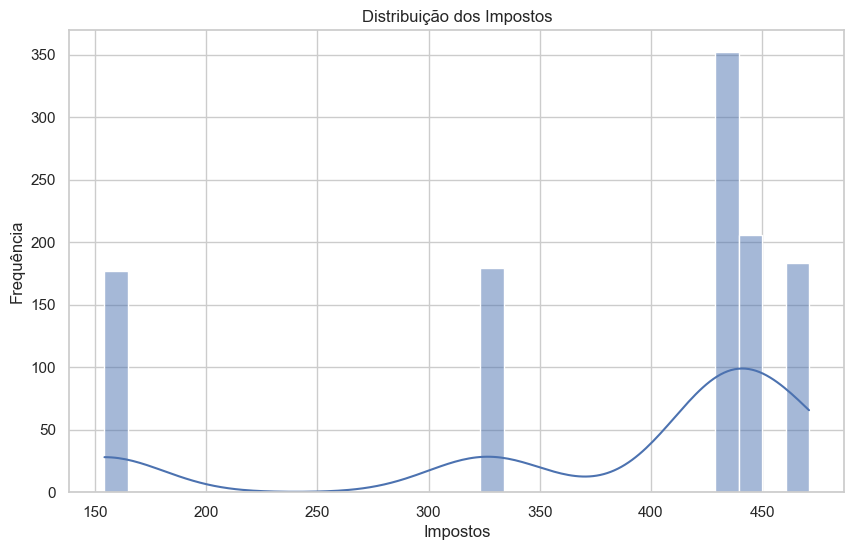

In [46]:
# Configurando o estilo do seaborn
sns.set(style = "whitegrid")

# Criando o histograma para a coluna 'impostos'
plt.figure(figsize = (10, 6))
sns.histplot(df_dsa_filtrado_2['impostos'], kde = True, bins = 30)
plt.title('Distribuição dos Impostos')
plt.xlabel('Impostos')
plt.ylabel('Frequência')
plt.show()

**Interpretação do Histograma**:

Interpretar um histograma é fundamental para compreender a distribuição dos dados. Um histograma é um gráfico que mostra a frequência com que os valores de um conjunto de dados ocorrem dentro de intervalos específicos ou 'bins'. Aqui estão os passos para interpretá-lo:

**1. Observe a Forma Geral**

A forma do histograma pode revelar muito sobre a natureza dos dados.

Distribuição simétrica: Se o gráfico é simétrico em torno de um valor central, indica uma distribuição normal ou quase normal.

Distribuição assimétrica: Se a cauda do gráfico se estende mais para a esquerda ou direita, indica uma assimetria (skewness). Para a esquerda é assimetria negativa; para a direita é assimetria positiva.

In [47]:
from scipy.stats import skew

In [48]:
# Calculando a assimetria (skewness)
skewness = skew(df_dsa_filtrado_2['valor'])
print(f"A assimetria da distribuição dos valores é: {skewness}")

A assimetria da distribuição dos valores é: 0.09784439352386005


In [49]:
# Calculando a assimetria (skewness)
skewness = skew(df_dsa_filtrado_2['impostos'])
print(f"A assimetria da distribuição dos valores é: {skewness}")

A assimetria da distribuição dos valores é: -1.2735246899435217


- Um valor de assimetria de zero sugere que a distribuição é perfeitamente simétrica.
- Um valor de assimetria positivo indica uma distribuição com cauda mais pesada à direita.
- Um valor de assimetria negativo indica uma distribuição com cauda mais pesada à esquerda.

**2. Identifique Picos e Vales**

Presença de múltiplos picos: Isso pode indicar que os dados têm múltiplos grupos ou modas.

Picos (Modas): Os pontos mais altos do histograma são as modas, indicando os valores mais comuns nos dados.
Vales: São as áreas entre picos, que podem indicar uma separação entre diferentes grupos nos dados.

**3. Verifique a Largura dos Bins**

A largura dos intervalos (bins) pode afetar a aparência do histograma. Bins muito largos podem esconder detalhes importantes, enquanto bins muito estreitos podem mostrar muita variação aleatória.

**4. Observe Outliers**

Os outliers podem aparecer como barras isoladas distantes do resto dos dados, indicando valores atípicos.

**5. Analise o Eixo X e Y**

- Eixo X (horizontal): Mostra os intervalos de valores dos dados.
- Eixo Y (vertical): Mostra a frequência ou contagem de ocorrências em cada bin.

## Analisando e Interpretando Bloxplots

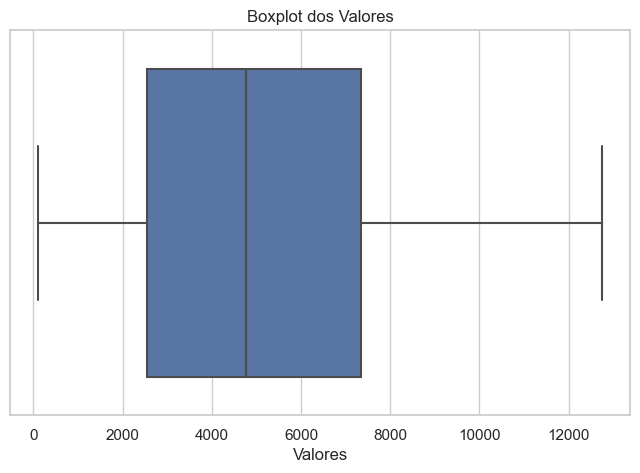

In [50]:
# Boxplot dos valores
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_dsa_filtrado_2['valor'])
plt.title('Boxplot dos Valores')
plt.xlabel('Valores')
plt.show()

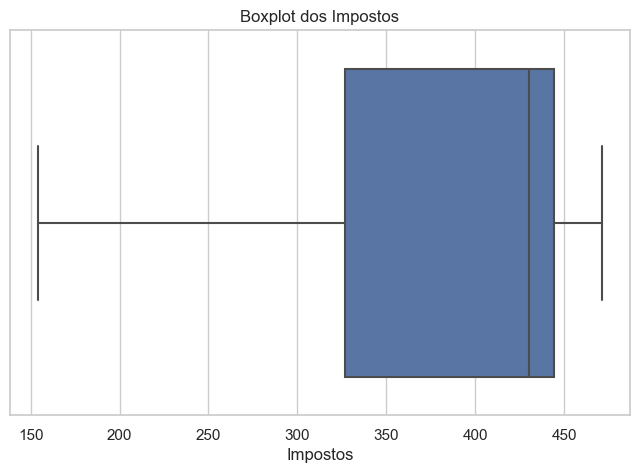

In [51]:
# Boxplot dos impostos
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_dsa_filtrado_2['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impostos')
plt.show()

**Interpretação do Boxplot**:

Interpretar um boxplot, também conhecido como diagrama de caixa, é essencial para entender a distribuição, a centralidade e a dispersão dos dados. O boxplot oferece uma representação visual concisa que destaca os quartis e os valores atípicos (outliers) dos dados. Aqui estão os componentes principais de um boxplot e como interpretá-los:

![DSA](boxplot.png)

**1. Quartis**

O boxplot é dividido em quartis:

- Q1 (Primeiro Quartil): Representa o valor abaixo do qual 25% dos dados se encontram.
- Q2 (Mediana): Divide os dados ao meio - 50% dos dados estão abaixo e 50% acima dela. 
- Q3 (Terceiro Quartil): Representa o valor abaixo do qual 75% dos dados se encontram. 

**2. Intervalo Interquartil (IQR)**

IQR: A distância entre Q1 e Q3. Representa a amplitude dos 50% centrais dos dados. Um IQR maior indica maior dispersão.

**3. Bigodes (Whiskers)**

Os 'bigodes' estendem-se do Q1 e Q3 para mostrar a variação fora do meio 50%. Normalmente, eles se estendem até 1.5 * IQR acima de Q3 e abaixo de Q1.

Dados fora dos bigodes podem ser considerados atípicos ou potenciais outliers.

**4. Outliers**

Outliers: São pontos de dados que caem fora dos bigodes. Eles são frequentemente representados por pontos ou círculos individuais no gráfico.

**5. Simetria**

Se a mediana está no centro da caixa e os bigodes têm comprimentos semelhantes, os dados são mais simétricos.

Se a mediana está mais próxima de Q1 ou Q3, ou se um bigode é significativamente mais longo que o outro, os dados são assimétricos.

Uma caixa mais longa indica maior variabilidade nos dados centrais. A presença de outliers pode indicar variações extremas ou problemas com os dados.

## Análise Exploratória Multivariada

### Analisando e Interpretando Mapas de Correlação

In [52]:
df_dsa_filtrado_2.head()

,id,data_lancamento,conta_debito,conta_credito,valor,documento,natureza_operacao,centro_custo,impostos,moeda,taxa_conversao
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,BRL,3.475606
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,OP62LG1,CC98G2K,471.09236,JPY,3.523287
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,Outro,OP62LG1,CCZD80Y,154.26398,EUR,3.523287


In [53]:
df_dsa_filtrado_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1097 non-null   int64         
 1   data_lancamento    1097 non-null   datetime64[ns]
 2   conta_debito       1097 non-null   object        
 3   conta_credito      1097 non-null   object        
 4   valor              1097 non-null   float64       
 5   documento          1097 non-null   object        
 6   natureza_operacao  1097 non-null   object        
 7   centro_custo       1097 non-null   object        
 8   impostos           1097 non-null   float64       
 9   moeda              1097 non-null   object        
 10  taxa_conversao     1097 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 102.8+ KB


In [54]:
# Convertendo 'data_lancamento' para datetime
df_dsa_filtrado_2['data_lancamento'] = pd.to_datetime(df_dsa_filtrado_2['data_lancamento'])

# Criando uma nova coluna que representa o número de dias desde a data mais antiga
min_date = df_dsa_filtrado_2['data_lancamento'].min()
df_dsa_filtrado_2['dias_desde_lancamento'] = (df_dsa_filtrado_2['data_lancamento'] - min_date).dt.days

In [55]:
df_dsa_filtrado_2.head()

,id,data_lancamento,conta_debito,conta_credito,valor,documento,natureza_operacao,centro_custo,impostos,moeda,taxa_conversao,dias_desde_lancamento
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,BRL,3.475606,788
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287,861
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287,82
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,OP62LG1,CC98G2K,471.09236,JPY,3.523287,530
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,Outro,OP62LG1,CCZD80Y,154.26398,EUR,3.523287,1047


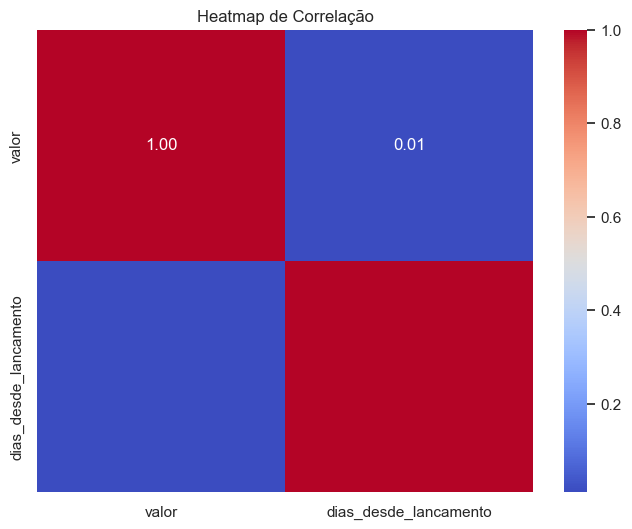

In [56]:
# Calculando a correlação entre 'valor' e 'dias_desde_lancamento'
correlation_matrix = df_dsa_filtrado_2[['valor', 'dias_desde_lancamento']].corr()

# Criando o heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Heatmap de Correlação")
plt.show()

O mapa de correlação (ou heatmap) é uma ferramenta visual utilizada para representar a força e a direção da correlação entre duas ou mais variáveis. Aqui está como interpretá-lo:

**Valores na Matriz:**

Cada célula na matriz mostra o coeficiente de correlação entre duas variáveis. O coeficiente de correlação varia de -1 a 1.

- 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
- -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui).
- 0 indica nenhuma correlação (as variáveis não têm relação linear).

**Cores:**

As cores representam a força da correlação, geralmente seguindo um gradiente de cores.

**Interpretação:**

- Correlação Positiva Forte (valores próximos a 1): Quando uma variável aumenta, a outra tende a aumentar também. Por exemplo, em dados de vendas, pode haver uma correlação positiva forte entre o gasto em publicidade e a receita.
- Correlação Negativa Forte (valores próximos a -1): Quando uma variável aumenta, a outra tende a diminuir. Por exemplo, em dados de saúde, pode haver uma correlação negativa forte entre a quantidade de exercício e o peso corporal.
- Correlação Fraca ou Inexistente (valores próximos a 0): As variáveis não têm uma relação linear clara. Uma variável não fornece informações confiáveis sobre a outra.

**Considerações:**

Correlação não implica causalidade. Mesmo se duas variáveis estão fortemente correlacionadas, isso não significa que uma causa a outra. Outros fatores podem influenciar as variáveis. Por isso, análises mais profundas, como a análise de causalidade, podem ser necessárias para compreender as relações entre variáveis.

Ao analisar o heatmap de correlação entre 'valor' e 'dias_desde_lancamento', você observa o grau em que essas duas variáveis se movem juntas e pode usar essa informação para compreender melhor as tendências e padrões nos seus dados.

## Analisando e Interpretando Gráficos de Dispersão

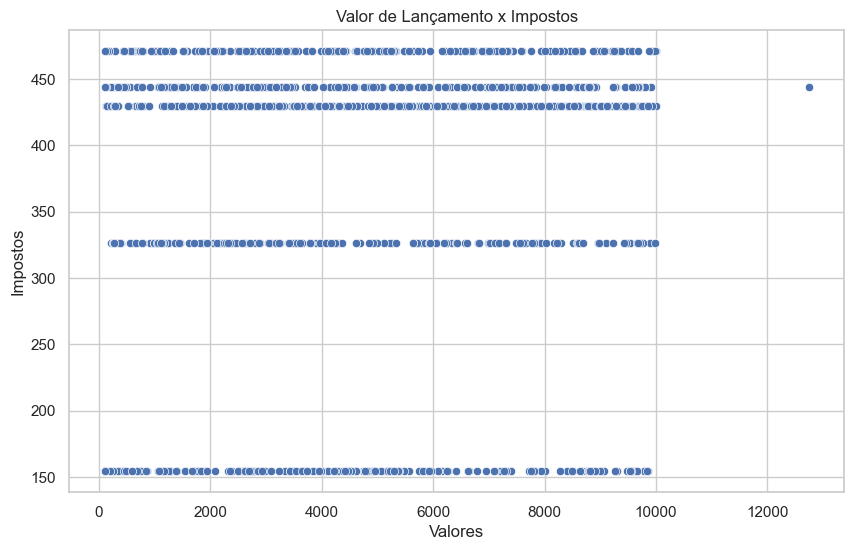

In [57]:
# Criando o gráfico de dispersão entre 'valor' e 'dias_desde_lancamento'
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'valor', y = 'impostos', data = df_dsa_filtrado_2)
plt.title('Valor de Lançamento x Impostos')
plt.xlabel('Valores')
plt.ylabel('Impostos')
plt.show()

O gráfico de dispersão é uma ferramenta visual eficaz para explorar a relação entre duas variáveis quantitativas. Aqui estão os aspectos chave para interpretar um gráfico de dispersão:

**Padrão Geral e Direção da Relação:**

- Positiva: Se os pontos tendem a subir da esquerda para a direita, isso indica uma correlação positiva; quando uma variável aumenta, a outra também tende a aumentar.
- Negativa: Se os pontos tendem a descer da esquerda para a direita, isso indica uma correlação negativa; quando uma variável aumenta, a outra tende a diminuir.
- Ausência de Tendência: Se os pontos estão espalhados aleatoriamente sem uma direção clara, isso sugere pouca ou nenhuma correlação linear entre as variáveis.

**Força da Relação:**

- Forte: Pontos próximos a uma linha imaginária indicam uma forte relação linear.
- Fraca: Pontos espalhados amplamente em torno da linha imaginária indicam uma relação linear mais fraca.
- Outliers: Pontos que não seguem o padrão geral podem indicar outliers ou anomalias, que podem ser dignas de investigação adicional.

**Forma da Relação:**

Além de lineares, as relações podem ser curvilíneas ou seguir outros padrões.

**Homocedasticidade vs. Heterocedasticidade:**

- Homocedasticidade: A dispersão dos pontos permanece constante ao longo do eixo.
- Heterocedasticidade: A dispersão dos pontos muda, o que pode indicar a variação da variabilidade de uma variável em relação à outra.

## Análise Exploratória de Dados Numéricos x Categóricos

Para analisar a associação entre uma variável categórica e uma numérica no conjunto de dados, primeiro precisamos escolher as variáveis adequadas. Uma abordagem comum é comparar uma variável numérica (como 'valor') com uma variável categórica (como 'conta_debito', 'conta_credito', 'natureza_operacao', 'centro_custo' ou 'moeda').

Vamos escolher uma variável categórica e realizar uma análise. Um método comum para isso é o uso de gráficos de caixa (boxplots), que mostram a distribuição da variável numérica dentro de cada categoria da variável categórica. Isso pode nos ajudar a entender se há diferenças significativas nos valores para diferentes categorias.

Vamos escolher uma variável categórica para análise e criar um boxplot para visualizar a associação. Vamos analisar a associação entre 'valor' e 'moeda'.

A variável categórica 'moeda' apresenta uma distribuição equilibrada, com quatro categorias (BRL, USD, JPY, EUR) e um número suficiente de observações em cada uma. Isso a torna adequada para uma análise de associação com a variável numérica 'valor'.

Vamos criar um boxplot para visualizar a distribuição dos valores para cada uma das moedas. Este tipo de gráfico nos ajudará a entender se há diferenças significativas nos valores transacionados em diferentes moedas. 

In [59]:
df_dsa_filtrado_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1097 non-null   int64         
 1   data_lancamento        1097 non-null   datetime64[ns]
 2   conta_debito           1097 non-null   object        
 3   conta_credito          1097 non-null   object        
 4   valor                  1097 non-null   float64       
 5   documento              1097 non-null   object        
 6   natureza_operacao      1097 non-null   object        
 7   centro_custo           1097 non-null   object        
 8   impostos               1097 non-null   float64       
 9   moeda                  1097 non-null   object        
 10  taxa_conversao         1097 non-null   object        
 11  dias_desde_lancamento  1097 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage:

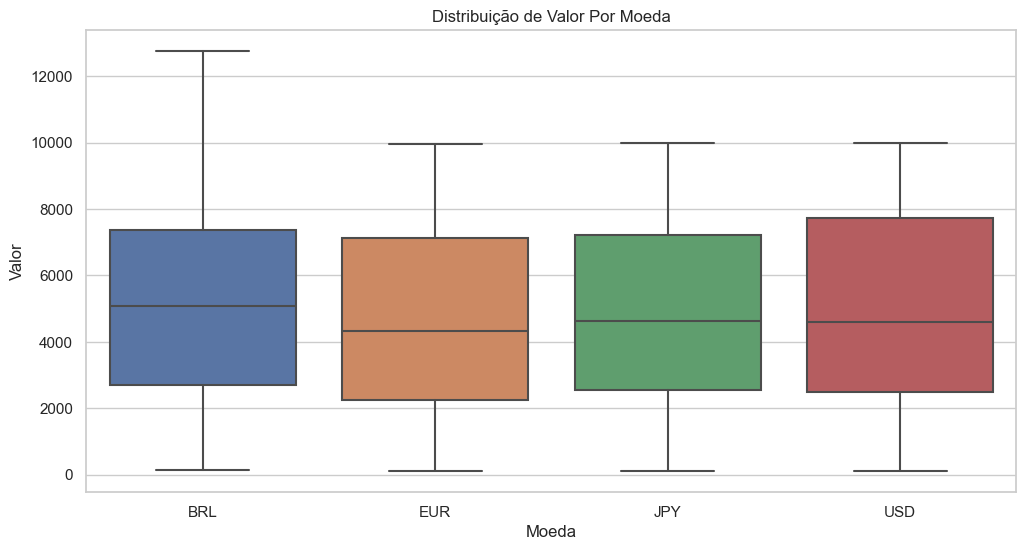

In [60]:
# Criando boxplot para analisar a associação entre 'valor' e 'moeda'
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'moeda', y = 'valor', data = df_dsa_filtrado_2)
plt.title('Distribuição de Valor Por Moeda')
plt.xlabel('Moeda')
plt.ylabel('Valor')
plt.show()

# Fim!